<a href="https://colab.research.google.com/github/estatwesley/proba/blob/main/Arquivo1_TProbabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# exp-01

*Divisores*

In [ ]:
import time
import pandas as pd

def d1(n):
    divisores = []
    for numeros in range(1, n + 1):
        resto = n % numeros
        if resto == 0:
            divisores.append(numeros)
    return divisores

def d2(n):
    divisores = []
    for numeros in range(1, n // 2 + 1):
        resto = n % numeros
        if resto == 0:
            divisores.append(numeros)
    divisores.append(n)
    return divisores

def d3(n):
    divisores = []
    for numeros in range(1, int(n**0.5) + 1):
        resto = n % numeros
        if resto == 0:
            divisores.append(numeros)
            if numeros != n // numeros:
                divisores.append(n // numeros)
    return divisores

def d4(n):
    divisores = []
    if n % 2 == 0:
        divisores.append(2)
    else:
        divisores.append(1)

    for numeros in range(3, int(n**0.5) + 1, 2):
        resto = n % numeros
        if resto == 0:
            divisores.append(numeros)
            if numeros != n // numeros:
                divisores.append(n // numeros)
    return divisores

def algoritmos(k, N=10**5):
    if k == 1:
        algoritmo = d1
        descricao = "Todos."
    elif k == 2:
        algoritmo = d2
        descricao = "Metade de 'n'."
    elif k == 3:
        algoritmo = d3
        descricao = "Raiz de 'n'."
    elif k == 4:
        algoritmo = d4
        descricao = "Raiz pulando de dois em dois."
    else:
        raise ValueError("Código de algoritmo inválido. Use 1, 2, 3 ou 4.")

    resultados = []
    while True:
        ini = time.time()
        algoritmo(int(N))
        fim = time.time()

        tempo = fim - ini
        resultados.append((N, tempo))
        if tempo < 5:
            N *= 10
        elif tempo >= 5 and tempo < 10:
            N *= 7
        elif tempo >= 10 and tempo < 20:
            N *= 5
        elif tempo >= 20 and tempo < 30:
            N *= 2
        elif tempo >= 30 and tempo < 45:
            N *= 1.2
        elif tempo >= 45 and tempo < 60:
            N *= 1.1
        if tempo >= 60:
            break

    melhor_resultado = max(resultados, key=lambda x: x[0])
    return (melhor_resultado[0], melhor_resultado[1], descricao)

if __name__ == "__main__":
    resultados_finais = []
    for i in range(1, 5):
        print(f"Testando o {i}º algoritmo.")
        resultado = algoritmos(i)
        resultados_finais.append((f'{i}º Algoritmo', resultado[0], resultado[1], resultado[2]))

    df = pd.DataFrame(resultados_finais, columns=['Algoritmo', 'Valor', 'Tempo (s)', 'Descrição'])
    print(df)

Testando o 1º algoritmo.
Testando o 2º algoritmo.
Testando o 3º algoritmo.
Testando o 4º algoritmo.
      Algoritmo     Descrição      Valor  \
0  1º Algoritmo  6.050000e+08  62.321949   
1  2º Algoritmo  1.100000e+09  87.815837   
2  3º Algoritmo  1.488111e+17  60.983624   
3  4º Algoritmo  6.493576e+17  62.744220   

                                           Tempo (s)  
0                                  Divide por todos.  
1                        Divide até a metade de 'n'.  
2                 Divide até a raiz quadrada de 'n'.  
3  Divide até a raiz quadrada de 'n', pulando de ...  


# exp-02

*Proporção de bolas*

Digite a quantidade de repetições do experimento: 10000


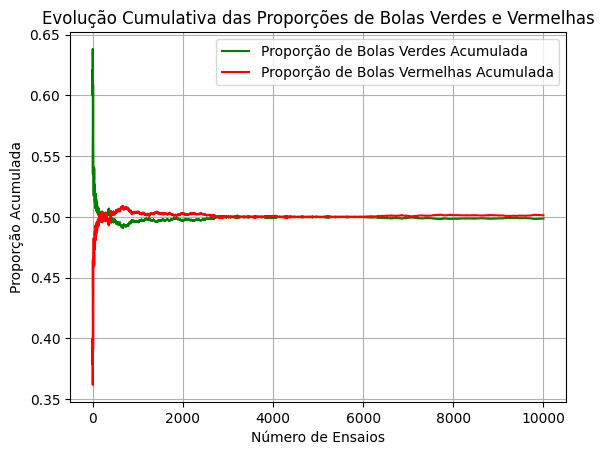

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

def lancar_dado(honesto=True):
    """
    Lança um dado honesto ou viciado e retorna o valor da face.
    """
    ud = random.uniform(0, 1)
    if honesto:
        if 0 < ud <= 1/6:
            return 1
        elif 1/6 < ud <= 2/6:
            return 2
        elif 2/6 < ud <= 3/6:
            return 3
        elif 3/6 < ud <= 4/6:
            return 4
        elif 4/6 < ud <= 5/6:
            return 5
        else:
            return 6
    else:
        if 0 < ud <= 4/20:
            return 1
        elif 4/20 < ud <= 7/20:
            return 2
        elif 7/20 < ud <= 10/20:
            return 3
        elif 10/20 < ud <= 13/20:
            return 4
        elif 13/20 < ud <= 16/20:
            return 5
        else:
            return 6

def simular_urna(qtd_experimentos, rep_por_experimento=10):
    """
    Simula a adição de bolas verdes e vermelhas na urna.
    Retorna as proporções acumuladas de bolas verdes e vermelhas.
    """
    proporcao_verdes = []
    proporcao_vermelhas = []

    verdes_totais = 0
    vermelhas_totais = 0

    for _ in range(qtd_experimentos):
        verdes_experimento = 0
        vermelhas_experimento = 0

        for _ in range(rep_por_experimento):
            if random.uniform(0, 1) <= 0.5:  # Lançar moeda honesta
                resultado = lancar_dado(honesto=True)
                verdes_experimento += resultado
            else:
                resultado = lancar_dado(honesto=False)
                vermelhas_experimento += resultado

        verdes_totais += verdes_experimento
        vermelhas_totais += vermelhas_experimento
        totais = verdes_totais + vermelhas_totais

        proporcao_verdes.append(verdes_totais / totais)
        proporcao_vermelhas.append(vermelhas_totais / totais)

    return proporcao_verdes, proporcao_vermelhas

def plotar_proporcoes(proporcao_verdes, proporcao_vermelhas):
    """
    Plota as proporções acumuladas de bolas verdes e vermelhas.
    """
    plt.plot(range(1, len(proporcao_verdes) + 1), proporcao_verdes, label='Proporção de Bolas Verdes Acumulada', color='green')
    plt.plot(range(1, len(proporcao_vermelhas) + 1), proporcao_vermelhas, label='Proporção de Bolas Vermelhas Acumulada', color='red')
    plt.xlabel('Número de Ensaios')
    plt.ylabel('Proporção Acumulada')
    plt.title('Evolução Cumulativa das Proporções de Bolas Verdes e Vermelhas')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    qtd_experimentos = int(input("Digite a quantidade de repetições do experimento: "))
    proporcao_verdes, proporcao_vermelhas = simular_urna(qtd_experimentos)
    plotar_proporcoes(proporcao_verdes, proporcao_vermelhas)

if __name__ == "__main__":
    main()


# exp-03

*Tabela da Normal Estimada*

         0.00      0.01      0.02      0.03      0.04      0.05      0.06  \
0.0  0.513888  0.513888  0.513888  0.513888  0.513888  0.513888  0.540662   
0.1  0.540662  0.540662  0.567028  0.567028  0.567028  0.567028  0.567028   
0.2  0.592913  0.592913  0.592913  0.592913  0.592913  0.592913  0.618600   
0.3  0.618600  0.618600  0.643465  0.643465  0.643465  0.643465  0.643465   
0.4  0.667966  0.667966  0.667966  0.667966  0.667966  0.667966  0.691842   
0.5  0.691842  0.691842  0.714838  0.714838  0.714838  0.714838  0.714838   
0.6  0.737102  0.737102  0.737102  0.737102  0.737102  0.737102  0.758554   
0.7  0.758554  0.758554  0.779042  0.779042  0.779042  0.779042  0.779042   
0.8  0.798048  0.798048  0.798048  0.798048  0.798048  0.798048  0.816190   
0.9  0.816190  0.816190  0.833347  0.833347  0.833347  0.833347  0.833347   
1.0  0.849559  0.849559  0.849559  0.849559  0.849559  0.849559  0.864720   
1.1  0.864720  0.864720  0.878822  0.878822  0.878822  0.878822  0.878822   

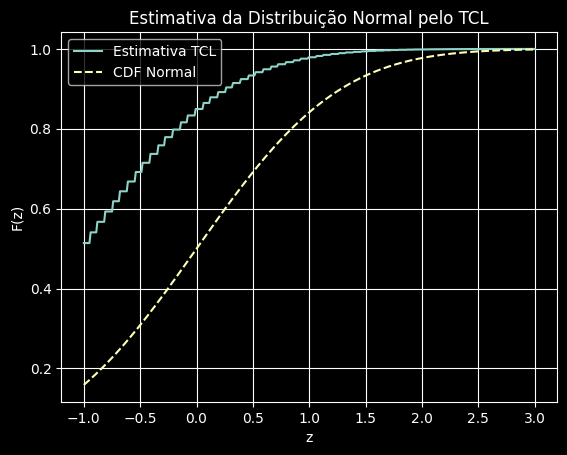

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import itertools

def batched(iterable, n):
    """
    Agrupa um iterável em batches de tamanho n.
    """
    if n < 1:
        raise ValueError('n must be at least one')
    it = iter(iterable)
    while batch := tuple(itertools.islice(it, n)):
        yield batch

def estimar_tcl(n=10**6, m=900, p=0.5):
    """
    Estima a tabela da normal através de aproximações numéricas dadas pelo TCL.
    Recebe 'n', número de repetições, 'm' e 'p' que são os parâmetros da binomial.
    """
    contador = np.zeros(400)

    for _ in range(n):
        aux = np.random.binomial(m, p)
        minimoz = (aux - m * p) / np.sqrt(m * p * (1 - p))
        pos_vet = max(0, round(-1 + minimoz * 100))
        contador[pos_vet:] += 1

    prob = contador / n
    return prob

def criar_tabela(valores):
    """
    Converte a saída de 'estimar_tcl()' para uma tabela da normal.
    Recebe a saída da função 'estimar_tcl()'.
    """
    tuplas = list(batched(valores, 10))  # Lista de tuplas
    tabela = pd.DataFrame(
        tuplas,
        columns=[x/100 for x in range(10)],
        index=[x/10 for x in range(40)]
    )
    return tabela

if __name__ == "__main__":
    # Estimar a tabela da normal
    valores_estimados = estimar_tcl()

    # Criar a tabela da normal
    tabela_normal = criar_tabela(valores_estimados)

    # Mostrar a tabela
    print(tabela_normal)

    # Plotar o gráfico da distribuição acumulada
    plt.plot(np.linspace(-1, 3, len(valores_estimados)), valores_estimados, label='Estimativa TCL')
    plt.plot(np.linspace(-1, 3, 1000), norm.cdf(np.linspace(-1, 3, 1000)), label='CDF Normal', linestyle='dashed')
    plt.xlabel('z')
    plt.ylabel('F(z)')
    plt.legend()
    plt.title('Estimativa da Distribuição Normal pelo TCL')
    plt.grid(True)
    plt.show


# exp-04

*Lei forte de Kolmogorov*

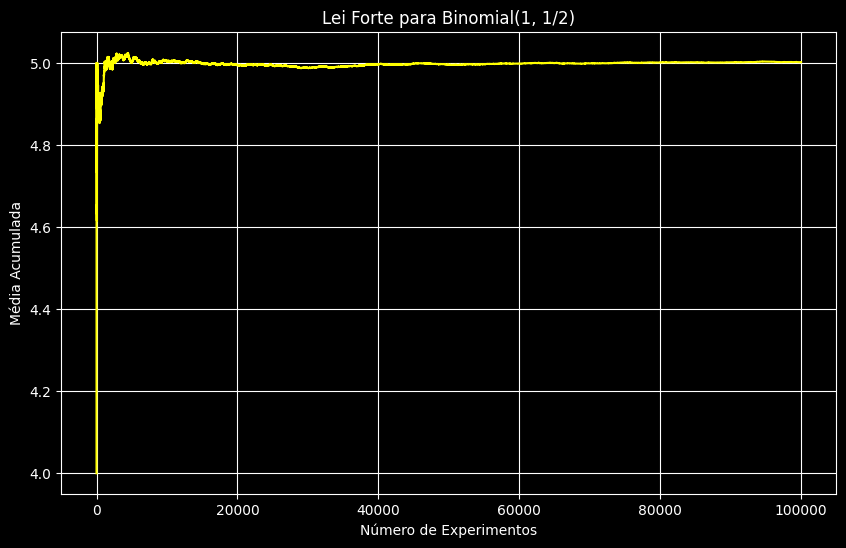

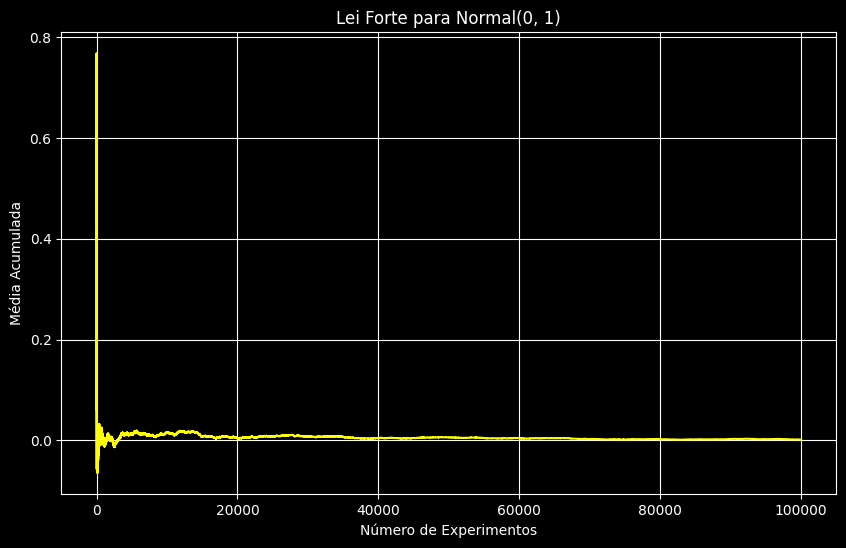

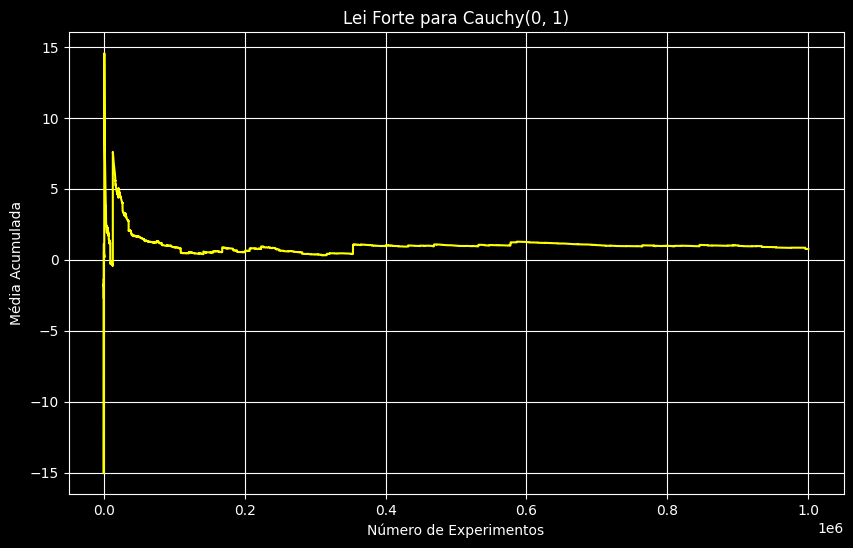

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Função para plotar resultados
def plot_results(vetormedias, title):
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(vetormedias, color='yellow')
    ax.set_title(title)
    ax.set_xlabel('Número de Experimentos')
    ax.set_ylabel('Média Acumulada')
    plt.grid(True)
    plt.show()

# Primeiro caso: Binomial
def lei_forte_binomial(p=0.5, m=10, n=10**5):
    soma = 0
    vetormedias = []
    for i in range(n):
        valor = stats.binom.rvs(n=m, p=p)
        soma += valor
        vetormedias.append(soma / (i + 1))
    plot_results(vetormedias, "Lei Forte para Binomial(1, 1/2)")

# Segundo caso: Normal(0, 1)
def lei_forte_normal(m=10, n=10**5):
    soma = 0
    vetormedias = []
    for i in range(n):
        valor = stats.norm.rvs()
        soma += valor
        vetormedias.append(soma / (i + 1))
    plot_results(vetormedias, "Lei Forte para Normal(0, 1)")

# Terceiro caso: Cauchy(0, 1)
def lei_forte_cauchy(m=10, n=10**6):
    soma = 0
    vetormedias = []
    for i in range(n):
        valor = stats.cauchy.rvs()
        soma += valor
        vetormedias.append(soma / (i + 1))
    plot_results(vetormedias, "Lei Forte para Cauchy(0, 1)")

# Executando os experimentos
lei_forte_binomial()
lei_forte_normal()
lei_forte_cauchy()


# exp-05

*Integral e Tabela da Normal por Monte Carlo*

Estimativa da integral de x^2 de 0 a 1: 0.3338364883012903
Estimativa da integral da tangente de -pi/2 a pi/2: -1.262550426197476
Estimativa da integral de x^9 * e^x de 1 a 3: 93107.51128632756
Tabela da Normal usando Monte Carlo:
         0.00      0.01      0.02      0.03      0.04      0.05      0.06  \
0.0  0.504039  0.508178  0.512416  0.516753  0.521188  0.525723  0.530354   
0.1  0.549843  0.554954  0.560167  0.565478  0.570883  0.576373  0.581945   
0.2  0.605205  0.611267  0.617411  0.623611  0.629966  0.636376  0.642904   
0.3  0.669768  0.676757  0.683720  0.690847  0.698097  0.705393  0.712723   
0.4  0.743170  0.750951  0.758865  0.766773  0.774903  0.783121  0.791241   
0.5  0.825124  0.833731  0.842280  0.851200  0.860181  0.869012  0.878107   
0.6  0.915121  0.924612  0.934138  0.943788  0.953341  0.963142  0.973009   
0.7  1.013248  1.023437  1.033605  1.044015  1.054520  1.065185  1.075714   
0.8  1.119236  1.130274  1.141007  1.152628  1.163564  1.174755  1.186204   

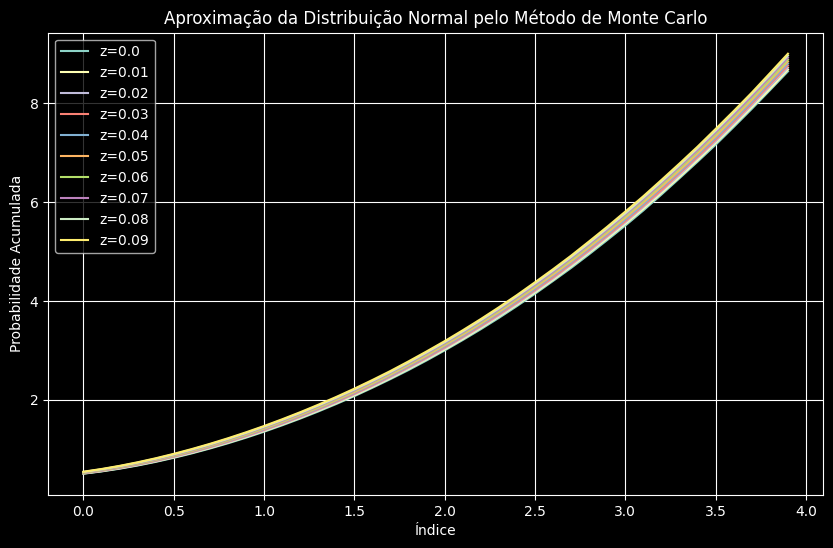

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Função para estimar integrais usando Monte Carlo
def estimar_integral(f, a, b, n=1000000):
    soma = 0
    for i in range(1, n+1):
        u = np.random.uniform(a, b)
        soma += f(u)
    return (b - a) * soma / n

# Função para construir a tabela da distribuição normal usando Monte Carlo
def construir_tabela_normal(n=1000000):
    soma = np.zeros(400)

    for i in range(1, n+1):
        for j in range(1, 401):
            u = np.random.uniform(0, j / 100)
            soma[j - 1] += (u + 1 / math.sqrt(2 * np.pi) * np.exp(-u**2 / 2))

    prob = [(i / 100) * soma[i - 1] / n + 0.5 for i in range(1, 401)]
    return prob

# Função para formatar a tabela
def formatar_tabela(prob):
    indices = [x / 10 for x in range(40)]
    colunas = [x / 100 for x in range(10)]

    # Agrupar valores em batches de 10 para criar a tabela
    batches = [prob[i:i+10] for i in range(0, 400, 10)]
    tabela = pd.DataFrame(batches, index=indices, columns=colunas)

    return tabela

# Estimar integrais
integral_x2 = estimar_integral(lambda x: x**2, 0, 1)
print(f"Estimativa da integral de x^2 de 0 a 1: {integral_x2}")

integral_tan = estimar_integral(lambda x: math.tan(x), -np.pi/2, np.pi/2)
print(f"Estimativa da integral da tangente de -pi/2 a pi/2: {integral_tan}")

integral_x9_ex = estimar_integral(lambda x: x**9 * np.exp(x), 1, 3)
print(f"Estimativa da integral de x^9 * e^x de 1 a 3: {integral_x9_ex}")

# Construir tabela da normal
probabilidades = construir_tabela_normal()
tabela_normal = formatar_tabela(probabilidades)
print("Tabela da Normal usando Monte Carlo:")
print(tabela_normal)

# Plotar a tabela da normal
plt.figure(figsize=(10, 6))
for col in tabela_normal.columns:
    plt.plot(tabela_normal.index, tabela_normal[col], label=f'z={col}')

plt.xlabel('Índice')
plt.ylabel('Probabilidade Acumulada')
plt.title('Aproximação da Distribuição Normal pelo Método de Monte Carlo')
plt.legend()
plt.grid(True)
plt.show()


# exp-06

*Ruína do Jogador*

Duração média: 99.87432, Probabilidade de ruína: 0.49861


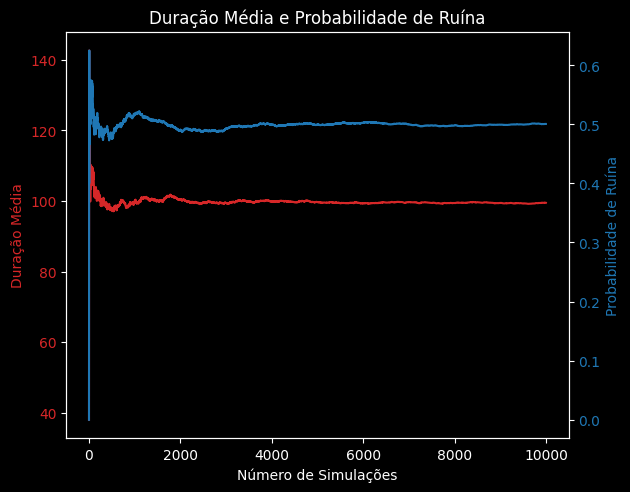

Duração média (jogador): 19.4526
Probabilidade de ruína (jogador): 0.8936


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para simular um único passeio aleatório
def ruina_jogador(p=0.5, c=10, m=20):
    """
    Simula um único passeio aleatório até o jogador alcançar a ruína (capital zero) ou a meta (capital m).

    Parâmetros:
    p (float): Probabilidade de sucesso (incrementar capital).
    c (int): Capital inicial.
    m (int): Meta de capital do jogador.

    Retorna:
    int: Tempo total do passeio até a ruína ou a meta.
    """
    s = c
    t = 0
    while 0 < s < m:
        s += 1 if np.random.uniform() < p else -1
        t += 1
    return t

# Função para calcular a duração média e a probabilidade de ruína
def media_ruina_tempo(p=0.6, c=10, m=20, n=100000):
    """
    Simula múltiplos passeios aleatórios e calcula a duração média do jogo e a probabilidade de ruína.

    Parâmetros:
    p (float): Probabilidade de sucesso (incrementar capital).
    c (int): Capital inicial.
    m (int): Meta de capital do jogador.
    n (int): Número de simulações.

    Retorna:
    tuple: Duração média do jogo e probabilidade de ruína.
    """
    ruinas = 0
    duracoes = np.zeros(n)

    for i in range(n):
        s = c
        t = 0
        while 0 < s < m:
            s += 1 if np.random.uniform() < p else -1
            t += 1
        duracoes[i] = t
        if s == 0:
            ruinas += 1

    duracao_media = np.mean(duracoes)
    prob_ruina = ruinas / n
    return duracao_media, prob_ruina

# Função para plotar a média da duração e a probabilidade de ruína ao longo das simulações
def plot_duracao_ruina(p=0.5, c=10, m=20, n=10000):
    """
    Plota a duração média e a probabilidade de ruína ao longo das simulações.

    Parâmetros:
    p (float): Probabilidade de sucesso (incrementar capital).
    c (int): Capital inicial.
    m (int): Meta de capital do jogador.
    n (int): Número de simulações.
    """
    ruinas = 0
    duracoes = np.zeros(n)
    medias = np.zeros(n)
    ruinas_acumuladas = np.zeros(n)

    for i in range(n):
        s = c
        t = 0
        while 0 < s < m:
            s += 1 if np.random.uniform() < p else -1
            t += 1
        duracoes[i] = t
        if s == 0:
            ruinas += 1
        medias[i] = np.mean(duracoes[:i+1])
        ruinas_acumuladas[i] = ruinas / (i + 1)

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Número de Simulações')
    ax1.set_ylabel('Duração Média', color=color)
    ax1.plot(range(n), medias, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Probabilidade de Ruína', color=color)
    ax2.plot(range(n), ruinas_acumuladas, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title("Duração Média e Probabilidade de Ruína")
    plt.show()

# Função para simular a ruína do jogador com diferentes recompensas e penalidades
def ruina_jogador_diferentes_recompensas(p=0.1, k=10, l=-2, c=20, m=40, n=10000):
    """
    Simula a ruína do jogador com diferentes recompensas e penalidades em cada rodada.

    Parâmetros:
    p (float): Probabilidade de sucesso (incrementar capital).
    k (int): Incremento do capital em caso de sucesso.
    l (int): Decremento do capital em caso de falha.
    c (int): Capital inicial.
    m (int): Meta de capital do jogador.
    n (int): Número de simulações.

    Retorna:
    tuple: Duração média do jogo e probabilidade de ruína.
    """
    ruinas = 0
    duracoes = np.zeros(n)

    for i in range(n):
        s = c
        t = 0
        while 0 < s < m:
            s += k if np.random.uniform() < p else l
            t += 1
        duracoes[i] = t
        if s == 0:
            ruinas += 1

    duracao_media = np.mean(duracoes)
    prob_ruina = ruinas / n
    return duracao_media, prob_ruina

# Exemplos de uso das funções

# Duracao média e probabilidade de ruína para um passeio aleatório
duracao, prob_ruina = media_ruina_tempo(p=0.5, c=10, m=20, n=100000)
print(f"Duração média: {duracao}, Probabilidade de ruína: {prob_ruina}")

# Plotando a duração média e probabilidade de ruína ao longo das simulações
plot_duracao_ruina(p=0.5, c=10, m=20, n=10000)

# Simulação da ruína do jogador com diferentes recompensas e penalidades
duracao_jogador, prob_ruina_jogador = ruina_jogador_diferentes_recompensas(p=0.1, k=10, l=-2, c=20, m=40, n=10000)
print(f"Duração média (jogador): {duracao_jogador}")
print(f"Probabilidade de ruína (jogador): {prob_ruina_jogador}")


# exp-07

*Passeio aleatório com meio aleatório*



In [ ]:
import numpy as np
import time

def passeio_aleatorio_com_tempo_limite(m=10**4, tempo_limite=10):
    """
    Simula um passeio aleatório com meio aleatório e calcula a média do tempo até a condição s >= 1.
    Interrompe a execução se ultrapassar o tempo limite e imprime o valor de n no momento da interrupção.

    Parâmetros:
    m (int): Número de simulações.
    tempo_limite (float): Tempo limite em segundos.

    Retorna:
    float: Média do tempo até a condição s >= 1.
    """
    dt = 0
    inicio = time.time()

    for i in range(m):
        n = 0
        s = 0
        while s < 1:
            if time.time() - inicio > tempo_limite:
                print(f"Interrompido no valor de n: {n}")
                return dt / max(1, i)  # Evita divisão por zero se i for 0
            p = np.random.uniform(0, 1)
            u = np.random.uniform(0, 1)
            s += 1 if u <= p else -1
            n += 1
        dt += n

    return dt / m

# Exemplo de uso
media_tempo = passeio_aleatorio_com_tempo_limite(m=10**4, tempo_limite=100)
print(f"Média do tempo até s >= 1: {media_tempo}")


Interrompido no valor de n: 1924599
Média do tempo até s >= 1: 2029.9698311652367


*Passeios Aleatórios Interagentes*

In [ ]:
def passeios_interagentes(n=100, m=10**4, p=0.1):
    """
    Simula um processo de partículas onde cada partícula se divide ou morre com base em uma probabilidade.

    Parâmetros:
    n (int): Número máximo de passos.
    m (int): Número de simulações.
    p (float): Probabilidade de uma partícula avançar para a direita e se dividir.

    Retorna:
    float: Proporção de simulações bem-sucedidas.
    """
    sucessos = 0

    for _ in range(m):
        pat = 1
        pos = 0
        while pos < n and pat > 0:
            novas_particulas = 0
            for _ in range(pat):
                u = np.random.uniform(0, 1)
                if u <= p:
                    novas_particulas += 2
            pos += 1
            pat = novas_particulas
        if pat > 0:
            sucessos += 1

    return sucessos / m

# Exemplo de uso
proporcao_sucessos = passeios_interagentes(n=100, m=10**4, p=0.5)
print(f"Proporção de simulações bem-sucedidas (p=0.5): {proporcao_sucessos}")

proporcao_sucessos = passeios_interagentes(n=100, m=10**4, p=0.49)
print(f"Proporção de simulações bem-sucedidas (p=0.49): {proporcao_sucessos}")


Proporção de simulações bem-sucedidas (p=0.5): 0.0179
Proporção de simulações bem-sucedidas (p=0.49): 0.0042


# exp-08

*Processos de Ramificação*

Total de indivíduos após o processo (Algoritmo 1): 1
Duração média do processo (Algoritmo 2): 8.14877
Número médio de indivíduos (Algoritmo 2): 99.30839


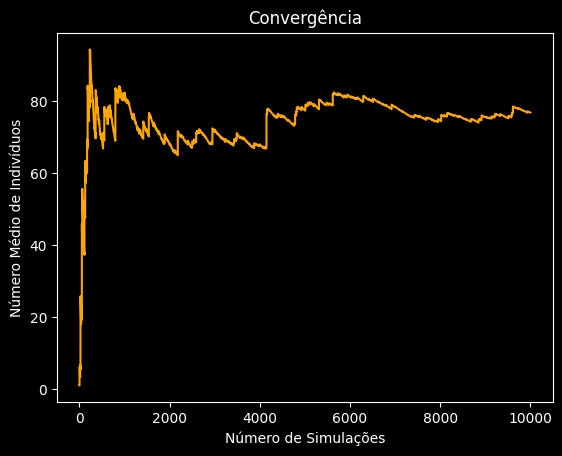

In [ ]:
import numpy as np
import scipy.stats as stata
import matplotlib.pyplot as plt

# Função Algoritmo 1
def alg1(L=0.99):
    """
    Simula um processo de crescimento populacional usando uma distribuição de Poisson.

    Parâmetros:
    L (float): Média da distribuição de Poisson.

    Retorna:
    int: Número total de indivíduos após o processo parar.
    """
    tempo = 0
    nind = 1
    tamger = 1

    while tamger > 0:
        cont = 0
        for _ in range(tamger):
            y = stata.poisson.rvs(L)
            cont += y
        nind += cont
        tamger = cont
        tempo += 1

    return nind

# Função Algoritmo 2
def alg2(n=10**5, L=0.99):
    """
    Simula múltiplos processos de crescimento populacional e calcula a duração média e o número médio de indivíduos.

    Parâmetros:
    n (int): Número de simulações.
    L (float): Média da distribuição de Poisson.

    Retorna:
    tuple: Duração média do processo e número médio de indivíduos.
    """
    total_tempo = 0
    total_individuos = 0

    for _ in range(n):
        tempo = 0
        tamger = 1
        nind = 1
        while tamger > 0:
            cont = 0
            for _ in range(tamger):
                y = stata.poisson.rvs(L)
                cont += y
            nind += cont
            tamger = cont
            tempo += 1
        total_tempo += tempo
        total_individuos += nind

    media_tempo = total_tempo / n
    media_individuos = total_individuos / n

    return media_tempo, media_individuos

# Função Algoritmo 3 (Blah)
def blah(n=10**5, L=0.99):
    """
    Simula múltiplos processos de crescimento populacional e plota a convergência do número médio de indivíduos.

    Parâmetros:
    n (int): Número de simulações.
    L (float): Média da distribuição de Poisson.
    """
    vetormedias = []
    total_individuos = 0

    for j in range(1, n + 1):
        tempo = 0
        tamger = 1
        nind = 1
        while tamger > 0:
            cont = 0
            for _ in range(tamger):
                y = stata.poisson.rvs(L)
                cont += y
            nind += cont
            tamger = cont
            tempo += 1
        total_individuos += nind
        vetormedias.append(total_individuos / j)

    plt.style.use('dark_background')
    fig, ax = plt.subplots()
    ax.plot(vetormedias, color='orange')
    ax.set_title("Convergência")
    plt.xlabel("Número de Simulações")
    plt.ylabel("Número Médio de Indivíduos")
    plt.show()

# Exemplos de uso das funções
# Algoritmo 1
resultado_alg1 = alg1(L=0.99)
print(f"Total de indivíduos após o processo (Algoritmo 1): {resultado_alg1}")

# Algoritmo 2
resultado_alg2 = alg2(n=10**5, L=0.99)
print(f"Duração média do processo (Algoritmo 2): {resultado_alg2[0]}")
print(f"Número médio de indivíduos (Algoritmo 2): {resultado_alg2[1]}")

# Algoritmo 3 (Blah)
blah(n=10**4, L=0.99)


# exp-09

*Filas MM1 e MMK*

In [ ]:
import numpy as np

# Função para simular fila M/M/1
def fila_mm1(taxa_chegada=1, taxa_atendimento=2, tempo_analise=10**6):
    """
    Simula a fila M/M/1 e retorna a taxa de ociosidade do servidor.

    Parâmetros:
    taxa_chegada (float): Taxa de chegada (λ).
    taxa_atendimento (float): Taxa de atendimento (μ).
    tempo_analise (int): Tempo total de análise.

    Retorna:
    float: Taxa de ociosidade do servidor.
    """
    np.random.seed(2024)
    fila = 1
    ociosidade = np.random.exponential(1)
    tempo = ociosidade

    while tempo <= tempo_analise:
        if fila == 0:
            l = np.random.exponential(1 / taxa_chegada)
            ociosidade += l
            tempo += l
            fila += 1
        else:
            l = np.random.uniform(0, 1)
            if l <= (taxa_chegada / (taxa_chegada + taxa_atendimento)):
                k = np.random.exponential(1 / (taxa_chegada + taxa_atendimento))
                fila += 1
                tempo += k
            else:
                k = np.random.exponential(1 / (taxa_chegada + taxa_atendimento))
                fila -= 1
                tempo += k

    taxa_ociosidade = round((ociosidade / tempo) * 100, 2)
    return taxa_ociosidade

# Função para simular fila M/M/K
def fila_mmk(servidores=4, taxa_chegada=3, taxa_atendimento=10, tempo_analise=10**6):
    """
    Simula a fila M/M/K e retorna a taxa de ociosidade do servidor.

    Parâmetros:
    servidores (int): Número de servidores (K).
    taxa_chegada (float): Taxa de chegada (λ).
    taxa_atendimento (float): Taxa de atendimento (μ).
    tempo_analise (int): Tempo total de análise.

    Retorna:
    float: Taxa de ociosidade do servidor.
    """
    np.random.seed(2024)
    fila = 1
    ociosidade = np.random.exponential(1)
    tempo = ociosidade

    while tempo <= tempo_analise:
        if fila <= 0:
            l = np.random.exponential(1 / taxa_chegada)
            ociosidade += l
            tempo += l
            fila += 1
        else:
            l = np.random.uniform(0, 1)
            if l <= (taxa_chegada / (taxa_chegada + taxa_atendimento)):
                k = np.random.exponential(1 / (taxa_chegada + taxa_atendimento))
                fila += 1
                tempo += k
            else:
                k = np.random.exponential(1 / (taxa_chegada + taxa_atendimento))
                fila -= 1
                tempo += k

    taxa_ociosidade = round((ociosidade / tempo) * 100, 2)
    return taxa_ociosidade

# Exemplo de uso
taxa_ociosidade_mm1 = fila_mm1(taxa_chegada=1, taxa_atendimento=2, tempo_analise=10**6)
print(f"O servidor ficou ocioso (M/M/1): {taxa_ociosidade_mm1}% do tempo")

taxa_ociosidade_mmk = fila_mmk(servidores=4, taxa_chegada=3, taxa_atendimento=10, tempo_analise=10**6)
print(f"O servidor ficou ocioso (M/M/K): {taxa_ociosidade_mmk}% do tempo")


O servidor ficou ocioso (M/M/1): 50.0% do tempo
O servidor ficou ocioso (M/M/K): 69.99% do tempo


# exp-10

*Percolação*


Formaram-se 11 grupos com pelo menos um nó:
[[1, 1], [17, 2, 37, 2], [46, 4], [9, 6], [42, 7], [58, 15], [38, 22], [29, 24], [56, 31], [50, 34], [53, 53]]

O maior grupo possui tamanho: 4
[17, 2, 37, 2]


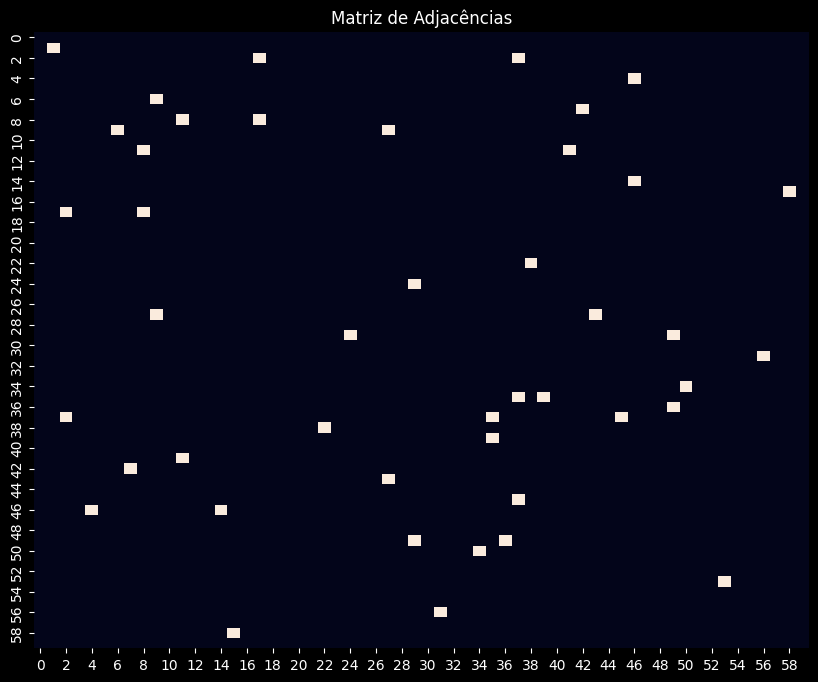

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import itertools
from scipy.stats import uniform

def percolar(dimensao, probabilidade):
    """
    Realiza a percolação em uma matriz de dimensão especificada e com uma probabilidade de conexão fornecida.

    Parâmetros:
    dimensao (int): A dimensão da matriz de adjacências.
    probabilidade (float): A probabilidade de sucesso para criar uma conexão entre os nós.
    """
    matriz_adj = parteum(dimensao, probabilidade)
    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz_adj, cbar=False)
    plt.title('Matriz de Adjacências')
    plt.show()

def parteum(n, p):
    """
    Realiza a percolação criando uma matriz de adjacências.

    Parâmetros:
    n (int): Dimensão da matriz.
    p (float): Probabilidade de sucesso.

    Retorna:
    pd.DataFrame: Matriz de adjacências.
    """
    matriz_adj = criar_matriz(n, p)
    no_em_comum = separar(matriz_adj)
    ajuntar(no_em_comum)
    return matriz_adj

def criar_matriz(n, p):
    """
    Cria uma matriz de adjacências com base na dimensão e probabilidade fornecida.

    Parâmetros:
    n (int): Dimensão da matriz.
    p (float): Probabilidade de sucesso.

    Retorna:
    pd.DataFrame: Matriz de adjacências.
    """
    matriz = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            sorteio = uniform.rvs()
            if sorteio <= p:
                matriz[i, j] = matriz[j, i] = 1
    matriz_df = pd.DataFrame(matriz)
    return matriz_df

def separar(matrizadj):
    """
    Lê uma matriz de adjacências e forma listas com as conexões formadas por cada nó.

    Parâmetros:
    matrizadj (pd.DataFrame): Matriz de adjacências.

    Retorna:
    list: Lista de grupos de nós conectados.
    """
    grupos = []
    for i in range(len(matrizadj)):
        atual = []
        for j in range(len(matrizadj)):
            if matrizadj.iloc[i, j] == 1:
                atual.append(j)
                atual.append(i)
        grupos.append(atual)
    return grupos

def ajuntar(listagrupos):
    """
    Agrupa os nós que têm ao menos uma conexão entre si.

    Parâmetros:
    listagrupos (list): Lista de grupos de nós conectados.
    """
    visitados = set()
    resultado = []

    for grupo in listagrupos:
        novo_grupo = set(grupo)
        if not novo_grupo & visitados:
            resultado.append(grupo)
        visitados |= novo_grupo

    contador, lmaior = 0, []
    for grupo in resultado:
        if len(grupo) > len(lmaior):
            lmaior = grupo
        if len(grupo) > 0:
            contador += 1

    print("\nFormaram-se", contador, "grupos com pelo menos um nó:")
    print(list(filter(None, resultado)))
    print("\nO maior grupo possui tamanho:", len(lmaior))
    print(lmaior)

# Exemplo de uso
percolar(60, .01)


# exp-11 REVER

*Transmissão de Informação no Maior Grupo*

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import itertools
from scipy.stats import uniform

def percolar(dimensao, probabilidade):
    """
    Realiza a percolação em uma matriz de dimensão especificada e com uma probabilidade de conexão fornecida.

    Parâmetros:
    dimensao (int): A dimensão da matriz de adjacências.
    probabilidade (float): A probabilidade de sucesso para criar uma conexão entre os nós.

    Retorna:
    tuple: Grupos juntos, o maior grupo e a matriz de adjacências.
    """
    matriz_adj = parteum(dimensao, probabilidade)
    return matriz_adj

def parteum(n, p):
    """
    Realiza a percolação criando uma matriz de adjacências.

    Parâmetros:
    n (int): Dimensão da matriz.
    p (float): Probabilidade de sucesso.

    Retorna:
    tuple: Grupos juntos, o maior grupo e a matriz de adjacências.
    """
    matriz_adj = criar_matriz(n, p)
    no_em_comum = separar(matriz_adj)
    grupos_juntos = ajuntar(no_em_comum)
    return grupos_juntos[0], grupos_juntos[1], matriz_adj

def criar_matriz(n, p):
    """
    Cria uma matriz de adjacências com base na dimensão e probabilidade fornecida.

    Parâmetros:
    n (int): Dimensão da matriz.
    p (float): Probabilidade de sucesso.

    Retorna:
    pd.DataFrame: Matriz de adjacências.
    """
    matriz = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            sorteio = uniform.rvs()
            if sorteio <= p:
                matriz[i, j] = matriz[j, i] = 1
    matriz_df = pd.DataFrame(matriz)
    return matriz_df

def separar(matrizadj):
    """
    Lê uma matriz de adjacências e forma listas com as conexões formadas por cada nó.

    Parâmetros:
    matrizadj (pd.DataFrame): Matriz de adjacências.

    Retorna:
    list: Lista de grupos de nós conectados.
    """
    grupos = []
    for i in range(len(matrizadj)):
        atual = []
        for j in range(len(matrizadj)):
            if matrizadj.iloc[i, j] == 1:
                atual.append(j)
                atual.append(i)
        grupos.append(atual)
    return grupos

def ajuntar(listagrupos):
    """
    Agrupa os nós que têm ao menos uma conexão entre si.

    Parâmetros:
    listagrupos (list): Lista de grupos de nós conectados.

    Retorna:
    tuple: Lista de grupos e o maior grupo.
    """
    LL = set(itertools.chain.from_iterable(listagrupos))
    for each in LL:
        components = [x for x in listagrupos if each in x]
        for i in components:
            listagrupos.remove(i)
        listagrupos.append(list(set(itertools.chain.from_iterable(components))))

    contador, lmaior = 0, []
    for grupo in listagrupos:
        if len(grupo) > len(lmaior):
            lmaior = grupo
        if len(grupo) > 0:
            contador += 1

    print("\nFormaram-se", contador, "grupos com pelo menos um nó:")
    print(list(filter(None, listagrupos)))
    print("\nO maior grupo possui tamanho:", len(lmaior))
    print(lmaior)

    return listagrupos, lmaior

def percorrer1(percolar1, p_transmitir):
    """
    Transmissão de informação com probabilidade de aceitação.
    O transmissor pode contactar cada indivíduo de seu grupo de maneira aleatória
    e o indivíduo tem chance de recusar a informação uma quantidade finita de vezes.

    Parâmetros:
    percolar1 (list): Lista de nós conectados.
    p_transmitir (float): Probabilidade de transmitir a informação.

    Retorna:
    int: Número de iterações para transmitir a informação a todo o grupo.
    """
    zeta = percolar1
    maiorgrupo = zeta.copy()
    informante = np.random.choice(maiorgrupo, 1, replace=False)[0]
    maiorgrupo.remove(informante)
    rede = [informante]
    iterar = 0
    while len(rede) < len(zeta):
        sorteio = uniform.rvs()
        iterar += 1
        if sorteio < p_transmitir:
            vitima = np.random.choice(maiorgrupo, 1)[0]
            if vitima not in rede:
                rede.append(vitima)
    return iterar

def percorrer(percolar, p_transmitir=1):
    """
    Transmissão de informação às ligações de primeiro grau.

    Parâmetros:
    percolar (tuple): Resultado da função de percolação.
    p_transmitir (float): Probabilidade de transmitir a informação.

    Retorna:
    int: Número de iterações para transmitir a informação a todo o grupo.
    """
    zeta = percolar[1]
    maiorgrupo = zeta.copy()
    informante = np.random.choice(maiorgrupo, 1, replace=False)[0]
    maiorgrupo.remove(informante)
    lig_direta = separar(percolar[2])[informante]
    rede = [informante]
    iterar = 0
    while len(rede) < len(zeta):
        sorteio = uniform.rvs()
        iterar += 1
        if sorteio < p_transmitir:
            vitima = np.random.choice(lig_direta, 1)[0]
            lig_vitima = separar(percolar[2])[vitima]
            lig_direta = [*lig_vitima, *lig_direta] # PEP 448
            lig_direta.remove(vitima)
            if vitima not in rede:
                rede.append(vitima)
    return iterar

# Exemplo de uso
alfa = percolar(65, .05)
print("\nMatriz de Adjacências:\n", alfa[2])
resposta = [percorrer1(alfa[1], .5) for i in range(1000)]
print("\nNúmero médio de iterações para transmissão de informação (percorrer1):", np.mean(resposta))
teste = [percorrer(alfa) for i in range(1000)]
print("\nNúmero médio de iterações para transmissão de informação (percorrer):", np.mean(teste))



Formaram-se 1 grupos com pelo menos um nó:
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]]

O maior grupo possui tamanho: 65
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]

Matriz de Adjacências:
      0    1    2    3    4    5    6    7    8    9   ...   55   56   57   58  \
0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  

KeyboardInterrupt: 

# exp-12

*Atualização de Opiniões*

In [ ]:
import scipy.stats as stata
import numpy as np
import pandas as pd

def alg(m, n, ra, rb, nsim):
    """
    Algoritmo para simular a atualização de opiniões.

    Parâmetros:
    m (int): Número de elementos do tipo I.
    n (int): Número de elementos do tipo II.
    ra (float): Parâmetro de atualização para o tipo I.
    rb (float): Parâmetro de atualização para o tipo II.
    nsim (int): Número de simulações.

    Retorna:
    tuple: Média das novas opiniões do tipo I e tipo II.
    """
    Ai = list(stata.uniform.rvs(size=m, scale=.1))
    Bi = list(stata.uniform.rvs(size=n, loc=.9, scale=.1))
    Anovo, Bnovo = Ai.copy(), Bi.copy()
    resultA, resultB = [], []

    if m == n:
        for i in range(nsim):
            e = [np.random.choice([*range(m)], 1)[0], np.random.choice([*range(n)], 1)[0]]
            Atil = (Anovo[e[0]] + ra * Bnovo[e[1]]) / (1 + ra)
            Btil = (Bnovo[e[1]] + rb * Anovo[e[0]]) / (1 + rb)
            Anovo[e[0]], Bnovo[e[1]] = Atil, Btil
            resultA.append(Atil)
            resultB.append(Btil)
        df = pd.DataFrame(data={"A": Ai, "B": Bi, "Anovo": Anovo, "Bnovo": Bnovo})
        print(df)
    else:
        davez = []
        for i in range(nsim):
            e = [np.random.choice([*range(m)], 1)[0], np.random.choice([*range(n)], 1)[0]]
            Atil = (Anovo[e[0]] + ra * Bnovo[e[1]]) / (1 + ra)
            Btil = (Bnovo[e[1]] + rb * Anovo[e[0]]) / (1 + rb)
            davez.append([Anovo[e[0]], Bnovo[e[1]], Atil, Btil])
            resultA.append(Atil)
            resultB.append(Btil)
        df = pd.DataFrame(data=davez, columns=["A", "B", "Anovo", "Bnovo"])
        print(df)

    sA = pd.Series(resultA)
    cumsum_sA = sA.cumsum()
    mean_sA = cumsum_sA / pd.Series(np.arange(1, len(sA) + 1))

    print(mean_sA)
    return np.mean(df["Anovo"]), np.mean(df["Bnovo"])

# Exemplo de uso
mean_Anovo, mean_Bnovo = alg(400, 300, .5, .15, 10**4)
print(f"Média de Anovo: {mean_Anovo}, Média de Bnovo: {mean_Bnovo}")


             A         B     Anovo     Bnovo
0     0.020067  0.903782  0.314639  0.788515
1     0.006298  0.925661  0.312752  0.805744
2     0.094917  0.998039  0.395958  0.880240
3     0.095885  0.966471  0.386080  0.852917
4     0.049399  0.943259  0.347352  0.826669
...        ...       ...       ...       ...
9995  0.046182  0.962591  0.351652  0.843060
9996  0.045383  0.971467  0.354077  0.850673
9997  0.099891  0.970419  0.390067  0.856871
9998  0.013366  0.950066  0.325599  0.827888
9999  0.079496  0.963444  0.374145  0.848147

[10000 rows x 4 columns]
0       0.314639
1       0.313696
2       0.341116
3       0.352357
4       0.351356
          ...   
9995    0.351268
9996    0.351268
9997    0.351272
9998    0.351269
9999    0.351271
Length: 10000, dtype: float64
Média de Anovo: 0.35127145217295136, Média de Bnovo: 0.8343487411636781


# exp-13

*Firework Process*

In [ ]:
import numpy as np

def firework_process(k, p):
    """
    Simula o processo de fogos de artifício com raio de ação k e distribuição geométrica.

    Args:
    k (int): Raio de ação, número máximo de partículas que uma partícula pode atingir.
    p (float): Parâmetro da distribuição geométrica (probabilidade de sucesso).

    Returns:
    int: Número total de partículas atingidas até o fim do experimento.
    """
    # Inicializa a fila de partículas com uma partícula inicial
    queue = [1]
    total_particles = 0

    while queue:
        # Retira a primeira partícula da fila
        current_particle = queue.pop(0)

        # Gera o número de novas partículas a partir da distribuição geométrica
        new_particles = np.random.geometric(p) - 1

        # Verifica se a partícula tem tamanho zero
        if new_particles == 0:
            break

        # Adiciona as novas partículas à fila, respeitando o raio de ação k
        queue.extend([1] * min(new_particles, k))

        # Atualiza o número total de partículas atingidas
        total_particles += new_particles

    return total_particles

# Parâmetros do experimento
k = 3  # Raio de ação
p = 0.5  # Parâmetro da distribuição geométrica

# Executa a simulação
total_particles_affected = firework_process(k, p)
print(f"Total de partículas atingidas até o fim do experimento: {total_particles_affected}")


22
2
6
7
2
8
1
29
14
25
3
6
8
0
Total de partículas atingidas até o fim do experimento: 133


In [ ]:
import numpy as np

def firework_process(k, p):
    """
    Simula o processo de fogos de artifício com raio de ação k e distribuição geométrica.

    Args:
    k (int): Raio de ação, número máximo de partículas que uma partícula pode atingir.
    p (float): Parâmetro da distribuição geométrica (probabilidade de sucesso).

    Returns:
    int: Número total de partículas atingidas até o fim do experimento.
    """
    # Inicializa a fila de partículas com uma partícula inicial
    queue = [1]
    total_particles = 0

    while queue:
        # Retira a primeira partícula da fila
        current_particle = queue.pop(0)

        # Gera o número de novas partículas a partir da distribuição geométrica
        new_particles = np.random.geometric(p) - 1

        # Verifica se a partícula tem tamanho zero
        if new_particles == 0:
            break

        # Adiciona as novas partículas à fila, respeitando o raio de ação k
        queue.extend([1] * min(new_particles, k))

        # Atualiza o número total de partículas atingidas
        total_particles += new_particles

    return total_particles

# Parâmetros do experimento
k = 3  # Raio de ação
p = 0.5  # Parâmetro da distribuição geométrica

# Executa a simulação várias vezes
num_simulations = 10
results = [firework_process(k, p) for _ in range(num_simulations)]

# Exibe os resultados
for i, result in enumerate(results, 1):
    print(f"Simulação {i}: Total de partículas atingidas = {result}")

# Exibe a média das partículas atingidas
average_particles = np.mean(results)
print(f"Média de partículas atingidas nas {num_simulations} simulações: {average_particles}")


Simulação 1: Total de partículas atingidas = 0
Simulação 2: Total de partículas atingidas = 3
Simulação 3: Total de partículas atingidas = 0
Simulação 4: Total de partículas atingidas = 0
Simulação 5: Total de partículas atingidas = 2
Simulação 6: Total de partículas atingidas = 2
Simulação 7: Total de partículas atingidas = 0
Simulação 8: Total de partículas atingidas = 0
Simulação 9: Total de partículas atingidas = 0
Simulação 10: Total de partículas atingidas = 1
Média de partículas atingidas nas 10 simulações: 0.8


In [ ]:
import numpy as np

def firework_process(k, p, max_steps=100):
    """
    Simula o processo de fogos de artifício com raio de ação k e distribuição geométrica.

    Args:
    k (int): Raio de ação, número máximo de partículas que uma partícula pode atingir.
    p (float): Parâmetro da distribuição geométrica (probabilidade de sucesso).
    max_steps (int): Número máximo de passos para evitar loops infinitos.

    Returns:
    int: Número total de partículas atingidas até o fim do experimento.
    """
    # Inicializa a lista de partículas com uma partícula inicial
    particle_list = []
    total_particles = 0
    current_index = 0

    while current_index < max_steps:
        # Gera o número de novas partículas a partir da distribuição geométrica
        new_particles = np.random.geometric(p) - 1

        # Adiciona a nova partícula à lista
        particle_list.append(new_particles)
        print(particle_list)

        # Verifica se a partícula tem tamanho zero
        if new_particles == 0:
            break

        # Atualiza o número total de partículas atingidas
        total_particles += 1

        # Salta para a próxima partícula, respeitando o raio de ação k
        current_index += min(new_particles, k)

    return total_particles, particle_list

# Parâmetros do experimento
k = 3  # Raio de ação
p = 0.5  # Parâmetro da distribuição geométrica

# Executa a simulação
total_particles_affected, particle_list = firework_process(k, p)
print(f"Total de partículas atingidas até o fim do experimento: {total_particles_affected}")
print(f"Lista de partículas geradas: {particle_list}")


[1]
[1, 3]
[1, 3, 3]
[1, 3, 3, 0]
Total de partículas atingidas até o fim do experimento: 3
Lista de partículas geradas: [1, 3, 3, 0]


In [ ]:
import numpy as np

def generate_particles(n, p):
    """
    Gera uma lista de partículas utilizando uma distribuição geométrica.

    Args:
    n (int): Número de partículas a serem geradas.
    p (float): Parâmetro da distribuição geométrica (probabilidade de sucesso).

    Returns:
    list: Lista de partículas geradas.
    """
    return np.random.geometric(p, n) - 1

def firework_process(particle_list, k):
    """
    Simula o processo de fogos de artifício com uma lista de partículas geradas.

    Args:
    particle_list (list): Lista de partículas onde o valor de cada partícula
                          determina o salto para a próxima partícula.
    k (int): Raio de ação, número máximo de partículas que uma partícula pode atingir.

    Returns:
    int: Número total de partículas atingidas até o fim do experimento.
    """
    total_particles = 0
    index = 0

    while index < len(particle_list):
        current_particle = particle_list[index]

        # Verifica se a partícula tem tamanho zero
        if current_particle == 0:
            break

        # Adiciona o número de novas partículas atingidas
        total_particles += 1

        # Salta para a próxima partícula, respeitando o raio de ação k
        index += min(current_particle, k)

    return total_particles

# Parâmetros do experimento
k = 3  # Raio de ação
p = 0.5  # Parâmetro da distribuição geométrica
n = 100  # Número de partículas a serem geradas

# Gera as partículas antes do experimento
particle_list = generate_particles(n, p)
print(f"Lista de partículas geradas: {particle_list}")

# Executa a simulação
total_particles_affected = firework_process(particle_list, k)
print(f"Total de partículas atingidas até o fim do experimento: {total_particles_affected}")


Lista de partículas geradas: [1 2 0 4 0 1 1 2 1 2 0 0 0 2 1 0 0 0 1 3 7 1 0 1 4 0 1 0 0 1 0 0 1 0 2 3 2
 0 0 0 1 1 0 3 1 0 3 0 0 2 2 0 0 0 2 2 0 0 0 2 1 0 0 0 0 2 1 0 0 5 2 4 0 0
 1 2 2 1 0 2 2 0 0 0 0 2 6 8 0 2 0 0 0 0 0 0 3 1 0 0]
Total de partículas atingidas até o fim do experimento: 6


In [ ]:
import numpy as np

def generate_particles(n, p):
    """
    Gera uma lista de partículas utilizando uma distribuição geométrica.

    Args:
    n (int): Número de partículas a serem geradas.
    p (float): Parâmetro da distribuição geométrica (probabilidade de sucesso).

    Returns:
    list: Lista de partículas geradas.
    """
    return np.random.geometric(p, n) - 1

def firework_process(particle_list, k):
    """
    Simula o processo de fogos de artifício com uma lista de partículas geradas.

    Args:
    particle_list (list): Lista de partículas onde o valor de cada partícula
                          determina o salto para a próxima partícula.
    k (int): Raio de ação, número máximo de partículas que uma partícula pode atingir.

    Returns:
    int: Número de partículas percorridas até o fim do experimento.
    """
    index = 0

    while index < len(particle_list):
        current_particle = particle_list[index]

        # Verifica se a partícula tem tamanho zero
        if current_particle == 0:
            break

        # Salta para a próxima partícula, respeitando o raio de ação k
        index += min(current_particle, k)

    return index

# Parâmetros do experimento
k = 3  # Raio de ação
p = 0.5  # Parâmetro da distribuição geométrica
n = 100  # Número de partículas a serem geradas

# Gera as partículas antes do experimento
particle_list = generate_particles(n, p)
print(f"Lista de partículas geradas: {particle_list}")

# Executa a simulação
last_index = firework_process(particle_list, k)
print(f"Índice da última partícula não-zero atingida: {last_index}")
print(f"Total de partículas percorridas até o fim do experimento: {last_index + 1}")


Lista de partículas geradas: [1 2 5 2 1 1 2 0 0 0 0 0 0 1 1 2 0 1 1 2 0 0 0 0 1 2 1 1 1 1 3 0 0 1 0 0 0
 1 1 1 0 2 1 2 0 0 1 3 1 3 0 1 3 1 1 0 0 3 2 0 0 3 0 0 1 0 0 0 0 2 1 0 0 5
 1 0 1 1 0 2 1 0 2 1 3 3 1 0 0 0 1 0 0 2 3 0 1 0 0 0]
Índice da última partícula não-zero atingida: 8
Total de partículas percorridas até o fim do experimento: 9



# exp-14

*Gerador Congruente Linear*



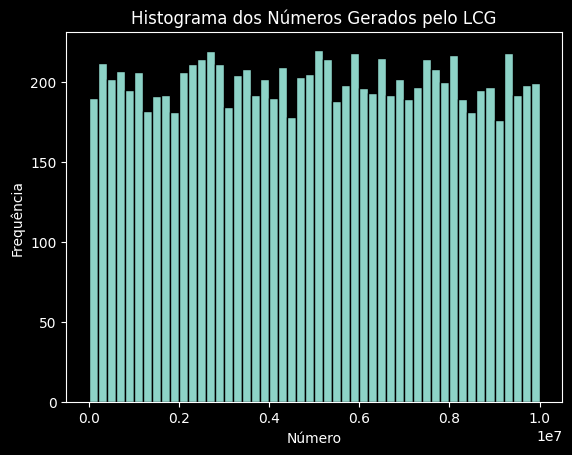

Estatística do Teste: 0.006378050756490339
Valor-p: 0.8081357320826962
Os números gerados seguem uma distribuição uniforme.
Período do LCG: 62504


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

def lcg(a, c, m, n, x0=0):
    """
    Gerador Congruente Linear (LCG)

    Parâmetros:
    a (int): Multiplicador
    c (int): Incremento
    m (int): Módulo
    n (int): Número de valores a serem gerados
    x0 (int): Valor inicial (semente)

    Retorna:
    list: Lista de números gerados
    """
    x = [x0]
    for i in range(n):
        x.append((a * x[-1] + c) % m)
    return x[1:]

def calcular_periodo(a, c, m, x0=0):
    """
    Calcula o período do LCG

    Parâmetros:
    a (int): Multiplicador
    c (int): Incremento
    m (int): Módulo
    x0 (int): Valor inicial (semente)

    Retorna:
    int: Período do LCG
    """
    x = [x0]
    while True:
        x_next = (a * x[-1] + c) % m
        if x_next in x:
            break
        x.append(x_next)
    return len(x)

def construir_histograma(numeros):
    """
    Constrói um histograma dos números gerados pelo LCG

    Parâmetros:
    numeros (list): Lista de números gerados pelo LCG
    """
    plt.hist(numeros, bins=50, edgecolor='black')
    plt.title("Histograma dos Números Gerados pelo LCG")
    plt.xlabel("Número")
    plt.ylabel("Frequência")
    plt.show()

def teste_aderencia(numeros):
    """
    Realiza um teste de aderência para verificar se os números seguem uma distribuição uniforme

    Parâmetros:
    numeros (list): Lista de números gerados pelo LCG
    """
    estatistica, p_valor = kstest(numeros, 'uniform', args=(min(numeros), max(numeros) - min(numeros)))
    print(f'Estatística do Teste: {estatistica}')
    print(f'Valor-p: {p_valor}')
    if p_valor > 0.05:
        print("Os números gerados seguem uma distribuição uniforme.")
    else:
        print("Os números gerados não seguem uma distribuição uniforme.")

# Parâmetros do LCG
a = 40692
c = 127
m = 10**7
n = 10000

# Gerar números e calcular o período
numeros = lcg(a, c, m, n)
periodo = calcular_periodo(a, c, m)

# Construir histograma
construir_histograma(numeros)

# Realizar teste de aderência
teste_aderencia(numeros)

# Mostrar o período calculado
print(f'Período do LCG: {periodo}')
